In [2]:
5 + 8*6 # Execute the cell by pressing Shift+Enter or Ctrl+Enter

53

Using variables is similar to other languages, although in Python there is no separate variable declaration. The data type of a variable depends on what is assigned to it.

In [3]:
a = 5
b, c = -1, 1              # We can assign values to more than one variable at the same time
s, x = 'a string', 2.1
print(a*b + x*c)
print(a**b)               # Exponentiation
print(s + ' ' + str(a))   # An explicit conversion of a number to a string is necessary here
b, c = c, b               # Swap the values of two variables
print(b, c)
s = a                     # Now s is no longer a string
print(s, type(s))

-2.9
0.2
a string 5
1 -1
5 <class 'int'>


### Conditional statements and loops
Conditional statements and loops are similar to most programming languages. The 'for' loop of Python iterates over a collection. To iterate over a range of numeric values, we can use the *range()* function. Range can take a lower limit, an upper limit and a step size as the parameters. If only one parameter is specified, it is the upper limit (which is itself excluded), lower limit is 0 and step size 1.

In [4]:
if b > 0:                          # A conditional statement
    print('Positive')
elif b < 0:                        # There can be any number of "else if" -branches, including 0
    print('Negative')
else:                              # At most one "else"-branch
    print('Zero')
    
print()
    
for i in [-1, 1, -2, 6]:           # Iterate over a list
    print(i, i**2)
    
print()
    
for i in range(10):                # Repeat for i = 0, 1, ..., 9 (the upper limit, 10, is excluded)
    print(i)
    
print()
    
for i in range(-3, 8, 2):          # Repeat for i = -3, -1, ..., 7
    print(i)

print()

i = -3
while i < 8:                       # The same as above but with a while loop
    print(i)
    i += 2                         # Here we must remember to increase the value of i

Positive

-1 1
1 1
-2 4
6 36

0
1
2
3
4
5
6
7
8
9

-3
-1
1
3
5
7

-3
-1
1
3
5
7


### Indentation
As seen above, in Python code blocks are defined by *indentation*, not by any particular block start and end characters (like '{' and '}' in Java). Some lines need to be ended in a colon (':'), e.g. conditional statements, loops and function definitions.

### Functions
Functions are defined using the 'def' keyword:

In [5]:
def f(x):           # A function definition
    return x**2

f(5)

25

### Data structures
The core language provides several data structures, such as 'list', 'tuple' and 'dictionary'. Lists and tuples are simple collections of values. Dictionaries consist of key-value pairs.

In [6]:
l = [1, 2, 3]              # A list
t = (1, 2, 3)              # A tuple - similar to a list but cannot be modified after creation
l[0] = 0                   # t[0] would not work because tuples are immutable
d = {'zero': 0, 'one': 1}  # A dictionary
print(l, t, d)
print(l[1], d['one'])      # l[1] is the second element of l - first index is 0
print(t[0:2])              # Elements at index 0 and 1 (end index is excluded)
print(t[0:3:2])            # Start index 0, end index 3, step size 2
print(t[::-1])             # Step size -1 (reverse), include all elements (start and end index empty)
l.append(4)                # Append an element to the end of a list
d['many'] = 3              # Add a new key-value pair to a dictionary
print(l, d)

[0, 2, 3] (1, 2, 3) {'zero': 0, 'one': 1}
2 1
(1, 2)
(1, 3)
(3, 2, 1)
[0, 2, 3, 4] {'zero': 0, 'one': 1, 'many': 3}


#### Nice to know, not essential for this course:
There are many handy features in Python that you can use to save some work: list comprehensions, filter and map functions, lambda functions (a lambda function is an unnamed function that is defined where it is used). Here are some examples but we won't cover them any further because our needs are quite modest in this course.

In [7]:
l1 = [x**2 for x in l]                   # List comprehension - can replace a loop in many cases
l2 = [x**2 for x in l if x > 0]          # List comprehension with some elements omitted
print(l1, l2)
print(list(filter(lambda x: x > 0, l1))) # Filter: include only positive elements
print(list(map(lambda x: x**2, l1)))     # Map: apply a function to all elements of a collection

[0, 4, 9, 16] [4, 9, 16]
[4, 9, 16]
[0, 16, 81, 256]


## NumPy
NumPy provides us with multi-dimensional arrays and methods for working with them. Among the methods are dot products of vectors, matrix products, calculating means and standard deviations, generating random numbers and many, many more. Let's start with the basics:

In [8]:
import numpy as np
vec1 = np.array([1, 2, 3])                          # A one-dimensional array (vector)
vec2 = np.array([1, 1, -1])
print(np.dot(vec1, vec2))                           # Dot product of vectors
print()
mat = np.array([[1, 1, 1], [1, -1, 1], [1, 1, -1]]) # A two-dimensional array (matrix)
print(mat)
print()
print(mat@vec1)                                     # Matrix product (vec1 is interpreted as a column vector)
print()
print(mat*vec1)                                     # Element-wise product, with broadcasting
print()
print(mat.T)                                        # Transpose of a matrix
print()
print(np.linalg.inv(mat))                           # Inverse of a matrix

0

[[ 1  1  1]
 [ 1 -1  1]
 [ 1  1 -1]]

[6 2 0]

[[ 1  2  3]
 [ 1 -2  3]
 [ 1  2 -3]]

[[ 1  1  1]
 [ 1 -1  1]
 [ 1  1 -1]]

[[ 0.   0.5  0.5]
 [ 0.5 -0.5 -0. ]
 [ 0.5 -0.  -0.5]]


Note that matrix product is denoted by the symbol @, not by * which is used for scalar multiplication or for element-wise product of the elements of two matrices. For example, if A and B are 3x3-matrices, (A\*B)[0, 0] = A[0]\*B[0] whereas (A@B)[0, 0] = A[0, 0]\*B[0, 0] + A[0, 1]\*B[1, 0] + A[0, 2]\*B[2, 0].

Above, we used the operator \* where the left-side object was a matrix, but on the right there was a vector. This works because of an automatically applied mechanism known as *broadcasting*. Conceptually, the vector [1, 2, 3] (here interpreted as a row vector) was repeated three times to get a 3x3-matrix with all rows equal to [1, 2, 3]. The matrix mat was then multiplied element-wise with this new matrix.

In most applications we don't want to enter the arrays manually as that would be tedious and error-prone. Instead, we may read data (here, the [well-known Iris data set](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/); you need to download iris.data from the page) from a file. If you are using this notebook via Google Colab, you will first need to upload the files you want to use, like this:

In [9]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

If you are not using Google Colab, you may proceed directly here:

In [10]:
orig_data = np.loadtxt('iris.data', dtype='object', delimiter=',')
print(orig_data)
# We see that only the four first columns are numeric, the fifth is the species. Let's get the
# numeric attributes into one array (contains numbers) and the species into a vector
X, y = orig_data[:, 0:4].astype(float), orig_data[:, 4]
print(X, y)

[['5.1' '3.5' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.0' '1.4' '0.2' 'Iris-setosa']
 ['4.7' '3.2' '1.3' '0.2' 'Iris-setosa']
 ['4.6' '3.1' '1.5' '0.2' 'Iris-setosa']
 ['5.0' '3.6' '1.4' '0.2' 'Iris-setosa']
 ['5.4' '3.9' '1.7' '0.4' 'Iris-setosa']
 ['4.6' '3.4' '1.4' '0.3' 'Iris-setosa']
 ['5.0' '3.4' '1.5' '0.2' 'Iris-setosa']
 ['4.4' '2.9' '1.4' '0.2' 'Iris-setosa']
 ['4.9' '3.1' '1.5' '0.1' 'Iris-setosa']
 ['5.4' '3.7' '1.5' '0.2' 'Iris-setosa']
 ['4.8' '3.4' '1.6' '0.2' 'Iris-setosa']
 ['4.8' '3.0' '1.4' '0.1' 'Iris-setosa']
 ['4.3' '3.0' '1.1' '0.1' 'Iris-setosa']
 ['5.8' '4.0' '1.2' '0.2' 'Iris-setosa']
 ['5.7' '4.4' '1.5' '0.4' 'Iris-setosa']
 ['5.4' '3.9' '1.3' '0.4' 'Iris-setosa']
 ['5.1' '3.5' '1.4' '0.3' 'Iris-setosa']
 ['5.7' '3.8' '1.7' '0.3' 'Iris-setosa']
 ['5.1' '3.8' '1.5' '0.3' 'Iris-setosa']
 ['5.4' '3.4' '1.7' '0.2' 'Iris-setosa']
 ['5.1' '3.7' '1.5' '0.4' 'Iris-setosa']
 ['4.6' '3.6' '1.0' '0.2' 'Iris-setosa']
 ['5.1' '3.3' '1.7' '0.5' 'Iris-setosa']
 ['4.8' '3.4' '1

For a description of what the columns represent, see [the Iris data set page](https://archive.ics.uci.edu/ml/datasets/iris) (Attributes).

In [11]:
# We will use the column names later
col_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

Let's compute the means of all four attributes. First, for all four classes of the flowers. Then, for Iris setosa only.

In [12]:
print(np.mean(X, axis=0))
print(np.mean(X[y == 'Iris-setosa'], axis=0))

[5.84333333 3.054      3.75866667 1.19866667]
[5.006 3.418 1.464 0.244]


Here, the parameter 'axis' specifies that we are interested in column-wise means (0 actually means *rows*; one needs to *iterate over all rows* to get the mean value of a column). If we don't specify any axis, we will get the mean of all values of the array.

In the second case we created a *Boolean vector* by the condition 'y == 'Iris-setosa''. The condition is *True* for all rows where the flower is of class 'Iris-setosa' and *False* for all other rows. Such a vector can be used to index an array. The result is that a row of the array is included if and only if the Boolean vector contains the value *True* in the corresponding position. The size of the Boolean vector should be equal to the number of rows in the array. We could also use a vector containing the indices of the wanted rows, and such a vector can be obtained using the 'where' function.

In [13]:
np.mean(X[np.where(y=='Iris-setosa')], axis=0)

array([5.006, 3.418, 1.464, 0.244])

We can generate many kinds of random sequences with NumPy. This includes samples from various kinds of statistical distributions or randomly selected samples from a given collection, with or without replacement. The latter case, samples from a collection without replacement, are also *permutations*.

In [14]:
print(np.random.uniform(low=1, high=3, size=20))                   # Samples from a uniform distributions
shuffled_classes = np.random.choice(y, size=len(y), replace=False) # Random permutation of y
print(shuffled_classes)

[1.99376677 2.62506965 1.82362401 1.5464647  1.30465975 2.68768774
 2.95493137 1.41668488 1.17690241 2.19153409 1.9016465  2.5272595
 1.4659961  2.09140306 2.49020112 1.75808457 1.29354982 2.1209597
 2.72137417 2.29732469]
['Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-vers

## Pandas
NumPy is a powerful library but for interactively working with tabular data it is not always ideal. For instance, we would quite likely want to *label* our columns in some way so that we don't need to look at a separate vector containing the labels whenever we have forgotten what the columns stand for. We might also want to use those labels as column indices instead of always using numbers from zero to the number of columns minus one. Perhaps we would like to do the same with rows, too.

Pandas is a package providing just that and more. The basic data structures of Pandas are Series (1D array, similar to a NumPy vector but item indices (labels) need not be integers) and DataFrame (similar to 2D NumPy array, with freely selectable row and column labels).

Let's load the Iris data into a Pandas DataFrame.

In [15]:
import pandas as pd
# Way 1: from a file
df1 = pd.read_csv('iris.data', names=col_names)
# Way 2: from a NumPy array
df2 = pd.DataFrame(orig_data, columns=col_names)
print(df1.dtypes, df2.dtypes)

sepal length    float64
sepal width     float64
petal length    float64
petal width     float64
class            object
dtype: object sepal length    object
sepal width     object
petal length    object
petal width     object
class           object
dtype: object


We note that the two ways of getting the data led to different data types of the columns. This is because in the NumPy array all values were of type object. In a Pandas DataFrame different columns can have different data types but in NumPy arrays that is not supported.

If we want to work with Pandas instead of NumPy, we would usually prefer the first way. The read_csv funtion of Pandas can also get the names of the columns from the file. Had we omitted 'names=col_names', the first row of the file would have been used as column names. In the present case that does not make sense because the file does not contain column labels. If numbers 0, 1, ... are acceptable as column names, we could omit the names parameter and add a new parameter 'header=None'. If some column contains values that we want to use as row names, we can add the parameter 'index_col= &lt;column number or name&gt;'.

Now that we have loaded the data, let's do something with it. Like with NumPy, we can compute row and column means and select rows or columns from the table.

In [16]:
print(df1.mean()) 
print(df1.mean(axis=1))          # Row means
setosa = df1[df1['class'] == 'Iris-setosa']
print(setosa.mean())             # Attribute (column) means for Iris setosa

sepal length    5.843333
sepal width     3.054000
petal length    3.758667
petal width     1.198667
dtype: float64
0      2.550
1      2.375
2      2.350
3      2.350
4      2.550
       ...  
145    4.300
146    3.925
147    4.175
148    4.325
149    3.950
Length: 150, dtype: float64
sepal length    5.006
sepal width     3.418
petal length    1.464
petal width     0.244
dtype: float64


As we saw above, the syntax is slightly different from NumPy when we want to compute, e.g., the means of some columns. Here, mean is a function (method) of the DataFrame object and it is therefore called like 'df1.mean()', whereas in NumPy we used 'np.mean(X, axis=0)'. Also note that with Pandas we did not get the mean of the entire array when we did not specify an axis.

We can convert a Pandas DataFrame to a NumPy array. The recommended way to do that depends on Pandas version. In older versions of Pandas one can use df.values, and the newer versions also support a method df.to_numpy()

In [17]:
np.mean(df1.iloc[:, 0:4].values)

3.4636666666666662

Here we converted a part of the DataFrame into a NumPy array and then computed the mean of all values.

There are many ways to index a DataFrame. One can use df[&lt;column name&gt;], df[Boolean_vector], df.loc[...] and df.iloc[...]. The first two can be a bit confusing at first. This is because the first one selects columns and the second one selects rows, despite the calls looking very similar to each other. Also, in NumPy we can select several rows of an array by a vector of row indices but in Pandas df[vector_of_labels] selects columns (unlike df[Boolean_vector] which selects rows).

To select rows or colums by numeric indices instead of row/column labels, one can use df.iloc[rows, columns]. Above, we selected all rows (indices ':' on the first axis) and four first columns (indices '0:4' on the second axis). When using iloc, the labels of the rows and columns are ignored, even if they happen to be numbers.

The final way, df.loc[rows, columns] works similarly to iloc but selection is done by row and column labels. One difference is that, for example, df.loc[:, start:end] contains also the column df[end] whereas it is omitted when using iloc. Here are some examples:

In [18]:
print(df1['class'])                           # Select a column by name
print(df1.iloc[:5, 4])                        # Select 5 rows and one column by index
print(df1.iloc[:5, 0:4])                      # Select 5 rows and 4 columns by index
print(df1.loc[:5, 'sepal length':'class'])    # Select 5 rows and columns between 'sepal length' and 'class' -
                                              # including the column 'class'. Here that selects all columns.

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: class, Length: 150, dtype: object
0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: class, dtype: object
   sepal length  sepal width  petal length  petal width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
   sepal length  sepal width  petal length  petal width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-s

Pandas can also compute correlations and draw scatter plots and histograms for us.

In [19]:
df1.corr()           # Correlations between columns

,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.109369,0.871754,0.817954
sepal width,-0.109369,1.000000,-0.420516,-0.356544
petal length,0.871754,-0.420516,1.000000,0.962757
petal width,0.817954,-0.356544,0.962757,1.000000


array([[<AxesSubplot:xlabel='sepal length', ylabel='sepal length'>,
        <AxesSubplot:xlabel='sepal width', ylabel='sepal length'>,
        <AxesSubplot:xlabel='petal length', ylabel='sepal length'>,
        <AxesSubplot:xlabel='petal width', ylabel='sepal length'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='sepal width'>,
        <AxesSubplot:xlabel='sepal width', ylabel='sepal width'>,
        <AxesSubplot:xlabel='petal length', ylabel='sepal width'>,
        <AxesSubplot:xlabel='petal width', ylabel='sepal width'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='petal length'>,
        <AxesSubplot:xlabel='sepal width', ylabel='petal length'>,
        <AxesSubplot:xlabel='petal length', ylabel='petal length'>,
        <AxesSubplot:xlabel='petal width', ylabel='petal length'>],
       [<AxesSubplot:xlabel='sepal length', ylabel='petal width'>,
        <AxesSubplot:xlabel='sepal width', ylabel='petal width'>,
        <AxesSubplot:xlabel='petal length', ylabel='petal 

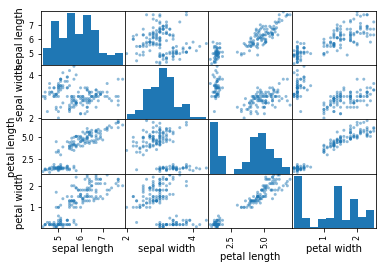

In [20]:
%matplotlib inline
# Without the above line the figure may not be shown. This 'magic incantation' is only needed once in a Jupyter
# Notebook document, before the first time we draw a figure.

pd.plotting.scatter_matrix(df1)

Pandas offers many functionalities not covered in this tutorial. For instance, one can make queries involving multiple tables, join tables etc. For more details, see [comparison with SQL](https://pandas.pydata.org/pandas-docs/stable/getting_started/comparison/comparison_with_sql.html). However, we won't need advanced functionality during this course. So, let's proceed to the next topic.

## Matplotlib
When we get a new data set, we usually want to make different kinds of plots to see what is in the data. There are other use cases for plots, too, such as reporting our results in a visual way. Matplotlib is one of many possible tools for visualization. Basic usage of Matplotlib is quite easy but more advanced plotting can be a bit cumbersome. In this course our needs are relatively simple.

Let's start by plotting a function of one variable $y=f(x)$.

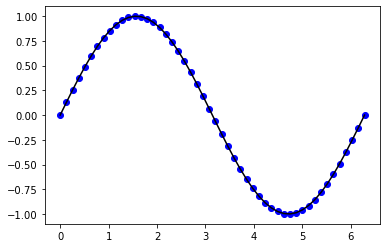

In [21]:
import matplotlib.pyplot as plt

x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

plt.plot(x, y, 'o', color='blue')              # Draw points without connecting them by line segments
plt.plot(x, y, color='black')                  # Connect consecutive points with line segments

It is possible to make a plot consisting of several subplots.

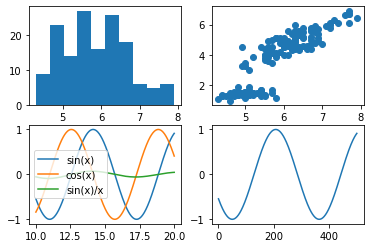

In [22]:
plt.subplot(2, 2, 1)
plt.hist(df1['sepal length'])                         # Histogram

plt.subplot(2, 2, 2)
plt.scatter(df1['sepal length'], df1['petal length']) # Scatter plot

# Next, we will try plotting a Pandas DataFrame. First we put some data to the DataFrame
plt.subplot(2, 2, 3)
x2 = np.linspace(10, 20, 500)
y2 = np.sin(x2)
y3 = np.cos(x2)
y4 = y2/x2
df = pd.DataFrame(columns=['sin(x)', 'cos(x)', 'sin(x)/x'])
df['sin(x)'] = y2
df['cos(x)'] = y3
df['sin(x)/x'] = y4
df = df.set_index(x2)
plt.plot(df)                            # Plots all columns of the data frame
plt.legend(df.columns)                  # Let's add a legend - although it won't look nice here

# If we plot a sequence of y values, the x values will be 0, 1, ... in the plot. Here,
# that gives a rather misleading impression of the function we are plotting.
plt.subplot(2, 2, 4)
plt.plot(df['sin(x)'].values)

We can add a title and axis labels to a plot:

Text(0, 0.5, 'Petal length (cm)')

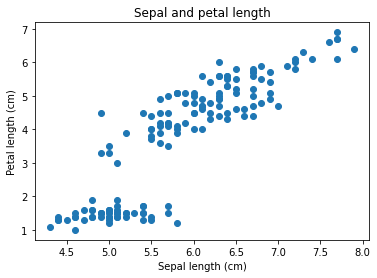

In [23]:
plt.scatter(df1['sepal length'], df1['petal length'])
plt.title('Sepal and petal length')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Petal length (cm)')

If you need to know Matplotlib in greater detail, you might check, for example, [Pyplot tutorial](https://matplotlib.org/3.1.1/tutorials/introductory/pyplot.html#sphx-glr-tutorials-introductory-pyplot-py).

But now, it is time for some exercises!

(Optional) If you are using Google Colab, start again with uploading the required files 'exercise_data.csv'.

## Exercises

(Optional) If you are using Google Colab, start again with uploading the required files 'exercise_data.csv'.

In [24]:
from google.colab import files
uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

Use the included data matrix 'exercise_data.csv'. Solve the following exercises.

1. Load the data into a Pandas data frame.
1. Find all objects of class 1 whose height is over 25 units. Print all of their attributes. *Hint*: you can combine the results of two comparisons using the '&' operator (class is 1 *and* height is over 25). Parentheses may be needed.
1. Compute the mean of each attribute for the whole data.
1. Make a plot of weights (y axis) vs. heights (x axis).
1. Make a plot of weights (y axis) vs. "size" (=$height \cdot width^2$, x axis).
1. Like 4-5 but limited to objects of class 1.
1. Do you see anything interesting in the plots?

In [25]:
# 1

data_frame = pd.read_csv('exercise_data.csv', header=[0])

data_frame.head()  #function to see that the data loads correctly

,Unnamed: 0,height,width,weight,class
0,0,18.022890,5.182596,50.527110,1
1,1,16.194651,4.383156,28.829918,1
2,2,18.150373,4.556691,38.565482,1
3,3,13.846924,3.798662,16.413877,1
4,4,27.364656,7.777790,166.997659,1


In [26]:
# 2


print(data_frame[(data_frame['class']== 1) & (data_frame['height'] > 25.00)])


    Unnamed: 0     height     width      weight  class
4            4  27.364656  7.777790  166.997659      1
16          16  25.640493  6.852879  122.388594      1
21          21  25.343498  7.226682  135.671038      1
33          33  26.893780  7.624959  164.284870      1
44          44  32.085549  9.016029  263.542786      1


In [27]:
# 3
H=data_frame['height'].mean()
print('Mean of height= ',H)
W=data_frame['width'].mean()
print('Mean of width= ',W)
w=data_frame['weight'].mean()
print('Mean of weight= ',w)

Mean of height=  31.938984766908135
Mean of width=  15.431008510951402
Mean of weight=  735.2926012543849


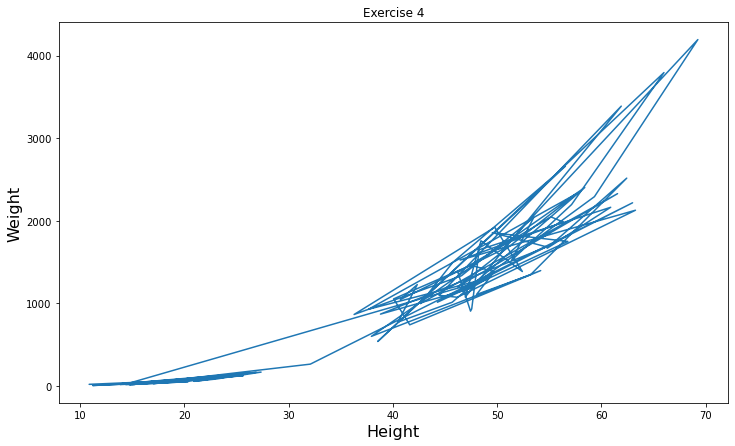

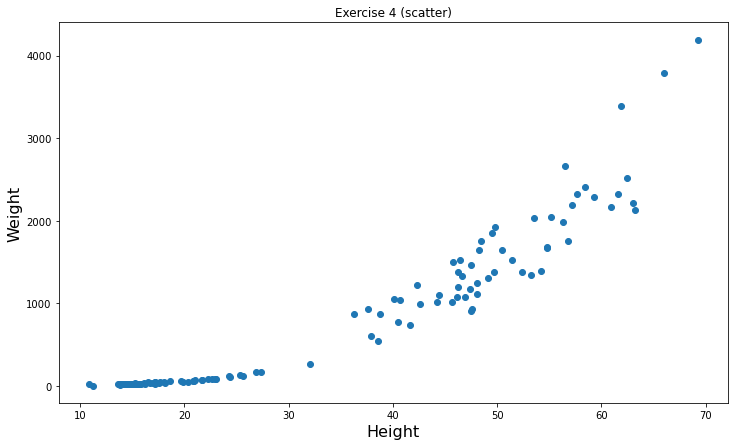

In [28]:
# 4
y1=data_frame['weight']
x1=data_frame['height']


plt.figure(figsize=(12,7))
plt.title("Exercise 4")
plt.xlabel("Height",fontsize=16)
plt.ylabel("Weight",fontsize=16)
plt.plot(x1,y1)


plt.figure(figsize=(12,7))
plt.title("Exercise 4 (scatter)")
plt.xlabel("Height",fontsize=16)
plt.ylabel("Weight",fontsize=16)
plt.scatter(x1,y1) #I added this later to draw conclusions

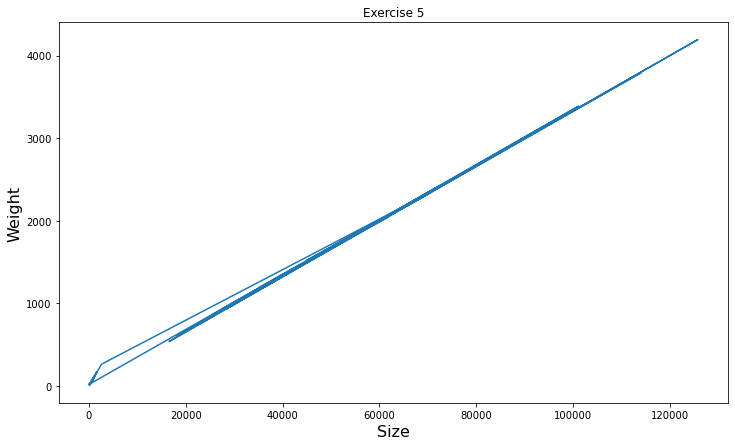

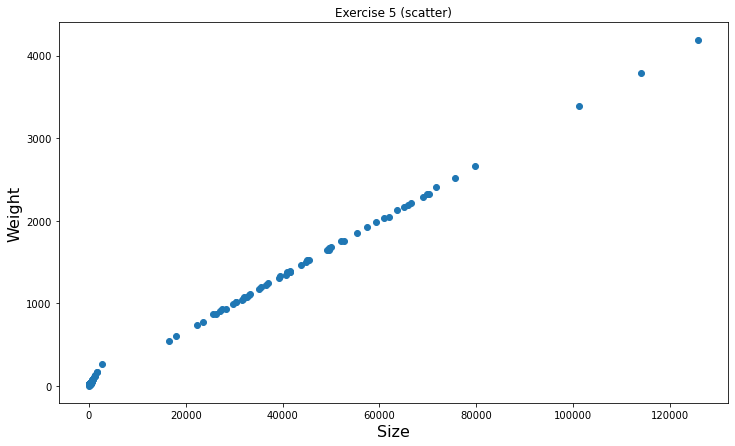

In [29]:
# 5

size=(data_frame['height'])*(data_frame['width']**2)


plt.figure(figsize=(12,7))
plt.title("Exercise 5")
plt.xlabel("Size",fontsize=16)
plt.ylabel("Weight",fontsize=16)
plt.plot(size,y1)


plt.figure(figsize=(12,7))
plt.title("Exercise 5 (scatter)")
plt.xlabel("Size",fontsize=16)
plt.ylabel("Weight",fontsize=16)
plt.scatter(size,y1)  #I added this later to draw conclusions

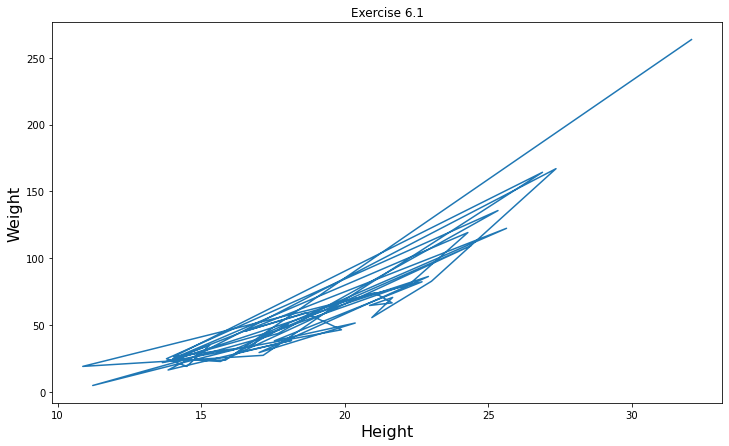

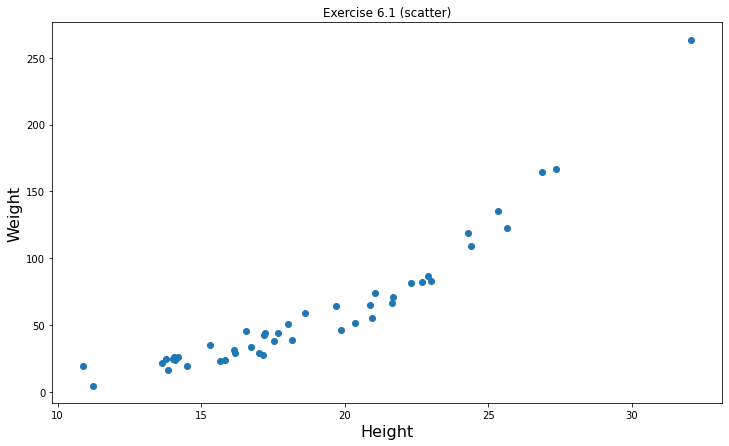

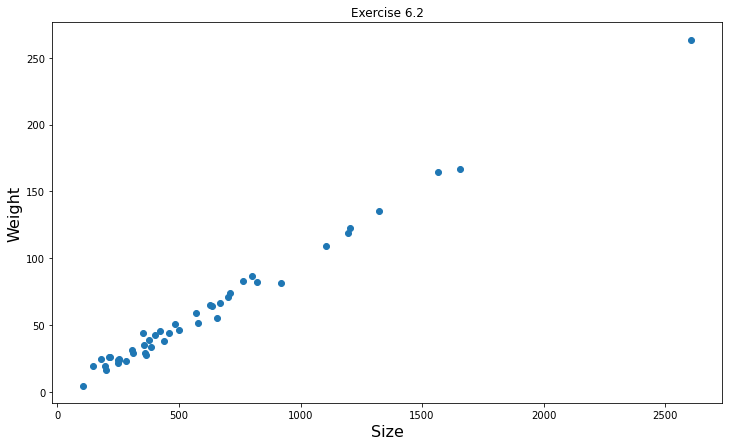

In [31]:
# 6
clas1 = data_frame[data_frame['class']==1]


y1_cls1=clas1['weight']
x1_cls1=clas1['height']


plt.figure(figsize=(12,7))
plt.title("Exercise 6.1")
plt.xlabel("Height",fontsize=16)
plt.ylabel("Weight",fontsize=16)
plt.plot(x1_cls1,y1_cls1)

plt.figure(figsize=(12,7))
plt.title("Exercise 6.1 (scatter)")
plt.xlabel("Height",fontsize=16)
plt.ylabel("Weight",fontsize=16)
plt.scatter(x1_cls1,y1_cls1) #this time I used a scatter plot to better see the data points


size_cls1=(clas1['height'])*(clas1['width']**2)


plt.figure(figsize=(12,7))
plt.title("Exercise 6.2")
plt.xlabel("Size",fontsize=16)
plt.ylabel("Weight",fontsize=16)
plt.scatter(size_cls1,y1_cls1)




# 7

For this type of exercise, it is better to use a scatter type of plot, rather than a normal one, because we can see the position of specific points a lot better. 

Regarding the actual results, we can observe that there is a higher concentration of points for lower values of the size and weight values, and the values are distributed in almost a linear way, which leads us to believe that the size and weight are closely related through a function such as y= a*x, which checks out with the initial condition given in the text of the problem ("size" = ℎ𝑒𝑖𝑔ℎ𝑡⋅𝑤𝑖𝑑𝑡ℎ^2). However, also because of this we can conclude that there are some variations for the height values, which is why we don't have a purely linear plot. 

When it comes to the height-size plots, we can see an exponential or a polynomial dependency, and while for exercise 4 we can observe that the points tend to diverge as the values increase and, thus, make the trend more obvious, for exercise 6, where we chose only objects of class 1, the plot seems to be somewhat more orderly, but almost to the point where it can be mistaken for a linear one if we don't look carefuly at the scatter plot (this isn't the case for the normal plot). So, when it comes to comparing the two types of plots (the ones that take into consideration all objects and the ones that use only objects of class 1), we can say that in the second case (only objects of class 1) the tendencies of the height-size plot aren't as clear anymore.